In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_path='/content/drive/MyDrive/competencia Kaggle Titanic/train.csv'
df_train = pd.read_csv(data_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train = df_train.drop([ 'Ticket', 'Cabin', 'Name'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
ohe = pd.get_dummies(train['Sex'], drop_first=True)
train.drop('Sex', axis=1, inplace=True)
train = train.join(ohe)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [ ]:
ohe = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop('Embarked', axis=1, inplace=True)
train = train.join(ohe)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
meanValue = np.round(train['Age'].mean(), 0)

In [ ]:
train['Age'] = train['Age'].fillna(meanValue)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [ ]:
train.isnull().values.any()

False

In [ ]:
X_train = train.iloc[:, train.columns != 'Survived']
y_train= train.loc[:, 'Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
std_scaler = StandardScaler()
X_train= std_scaler.fit_transform(X_train)

### Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
inputs = X_train.shape[1]

**Arquitectura 1**


In [ ]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oculta solo la primera necesita (input_dim = inputs
clasificador.add(Dense(input_dim = inputs, units=6, activation='relu', kernel_initializer='uniform'))

#segunda capa oculta ya en la segunda ya no se nesecita los input 
clasificador.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [ ]:
#parametros de optimización
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=10, epochs=100)

In [ ]:
path = '/content/drive/MyDrive/competencia Kaggle Titanic/' 
clasificador.save(path + '6_6_sig_out.h5')

In [ ]:
# Cargamos la red.
new_model = keras.models.load_model(path + '6_6_sig_out.h5')

## Predicciones

In [ ]:
data_path='/content/drive/MyDrive/competencia Kaggle Titanic/test.csv'
df_test = pd.read_csv(data_path)
df_test.head()

In [ ]:
test = df_test.drop([ 'Ticket', 'Cabin', 'Name'], axis = 1)
test.head()

In [ ]:
ohe = pd.get_dummies(test['Sex'], drop_first=True)
test.drop('Sex', axis=1, inplace=True)
test = test.join(ohe)
test.head()

In [ ]:
ohe = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop('Embarked', axis=1, inplace=True)
test = test.join(ohe)
test.head()

In [ ]:
meanValue = np.round(test['Age'].mean(), 0)

In [ ]:
test['Age'] = test['Age'].fillna(meanValue)
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
meanValuefare = np.round(test['Fare'].mean(), 0)

In [ ]:
test['Fare'] = test['Fare'].fillna(meanValue)
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
X_test = test.iloc[:, test.columns != 'Survived']
y_preds = new_model.predict(X_test)
y_preds =  y_preds.round()




In [ ]:
pred1 = pd.DataFrame(y_preds, 
             columns=['Survived'])

In [ ]:
prueba1 =pd.concat([test.loc[:, 'PassengerId'], pred1], axis=1, ignore_index=False)
prueba1

In [ ]:
prueba1 = prueba1.astype(int)
prueba1

In [ ]:
from google.colab import files
files.download("Clasificador1.csv")

**Arquitectura 2**



In [ ]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oculta solo la primera necesita (input_dim = inputs
clasificador.add(Dense(input_dim = inputs, units=10, activation='relu', kernel_initializer='uniform'))

#segunda capa oculta ya en la segunda ya no se nesecita los input 
clasificador.add(Dense(units=10, activation='relu', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

#parametros de optimización
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=25, epochs=3000)

In [ ]:
path2 = '/content/drive/MyDrive/competencia Kaggle Titanic/' 
clasificador.save(path2 + '10_10_sigmoid_out.h5')

In [ ]:
# Cargamos la red.
second_model = keras.models.load_model(path + '10_10_sigmoid_out.h5')

Prediccion 2

In [ ]:
y_preds = second_model.predict(X_test)
y_preds =  y_preds.round()

In [ ]:
pred2 = pd.DataFrame(y_preds, 
             columns=['Survived'])

In [ ]:
prueba2 =pd.concat([test.loc[:, 'PassengerId'], pred1], axis=1, ignore_index=False)
prueba2

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0


In [ ]:
prueba2 = prueba2.astype(int)
prueba2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
from google.colab import files
prueba2.to_csv('prueba2.csv', index=False)
files.download("prueba2.csv")

Arquitectura 3

In [ ]:
#base secuencial para definir la estructura de la Red (SIEMPRE INICIAR CON SQUENTIAL)
clasificador = Sequential()

#primera capa oculta solo la primera necesita (input_dim = inputs
clasificador.add(Dense(input_dim = inputs, units=4, activation='relu', kernel_initializer='uniform'))

#segunda capa oculta ya en la segunda ya no se nesecita los input 
clasificador.add(Dense(units=10, activation='relu', kernel_initializer='uniform'))

#capa de salida
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

#parametros de optimización
clasificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#parametros de entrenamiento.
clasificador.fit(X_train, y_train, batch_size=5, epochs=200)

In [ ]:
path3 = '/content/drive/MyDrive/competencia Kaggle Titanic/' 
clasificador.save(path2 + '4_10_sigmoid_out.h5')

In [ ]:
# Cargamos la red.
third_model = keras.models.load_model(path + '4_10_sigmoid_out.h5')

Prediccion 3

In [ ]:
y_preds = third_model.predict(X_test)
y_preds =  y_preds.round()

In [ ]:
pred3 = pd.DataFrame(y_preds, 
             columns=['Survived'])

In [ ]:
prueba3 =pd.concat([test.loc[:, 'PassengerId'], pred3], axis=1, ignore_index=False)
prueba3 = prueba3.astype(int)
prueba3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
from google.colab import files
prueba3.to_csv('prueba3.csv', index=False)
files.download("prueba3.csv")

**Arquitectura 4**

In [ ]:
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units=4, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=10, activation='relu', kernel_initializer='uniform'))
clasificador.add(Dense(units=8, activation='softsign', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
clasificador.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train, y_train, batch_size=25, epochs=150)

In [ ]:

path4 = '/content/drive/MyDrive/competencia Kaggle Titanic/' 
clasificador.save(path2 + '4_10_8_sigmoid_out.h5')


In [ ]:
# Cargamos la red.
fourth_model = keras.models.load_model(path + '4_10_8_sigmoid_out.h5')

Prediccion 4

In [ ]:
y_preds = fourth_model.predict(X_test)
y_preds =  y_preds.round()

In [ ]:
pred4 = pd.DataFrame(y_preds, 
             columns=['Survived'])

In [ ]:
prueba4 =pd.concat([test.loc[:, 'PassengerId'], pred4], axis=1, ignore_index=False)
prueba4 = prueba4.astype(int)
prueba4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
from google.colab import files
prueba4.to_csv('prueba4.csv', index=False)
files.download("prueba4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Arquitectura 5**

In [ ]:
clasificador = Sequential()
clasificador.add(Dense(input_dim =inputs, units=3, activation='softmax', kernel_initializer='uniform'))
clasificador.add(Dense(units=4, activation='softmax', kernel_initializer='uniform'))
clasificador.add(Dense(units=1, activation='softmax', kernel_initializer='uniform'))
clasificador.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
clasificador.fit(X_train,y_train, batch_size=5,epochs=150)

In [ ]:
path5 = '/content/drive/MyDrive/competencia Kaggle Titanic/' 
clasificador.save(path2 + '3_4_8_adam_out.h5')


In [ ]:
# Cargamos la red.
fifth_model = keras.models.load_model(path + '3_4_8_adam_out.h5')

Prediccion 5

In [ ]:
y_preds = fifth_model.predict(X_test)
y_preds =  y_preds.round()

In [ ]:
pred5 = pd.DataFrame(y_preds, 
             columns=['Survived'])

In [ ]:
prueba5 =pd.concat([test.loc[:, 'PassengerId'], pred5], axis=1, ignore_index=False)
prueba5 = prueba5.astype(int)
prueba5

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [ ]:
from google.colab import files
prueba5.to_csv('prueba5.csv', index=False)
files.download("prueba5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

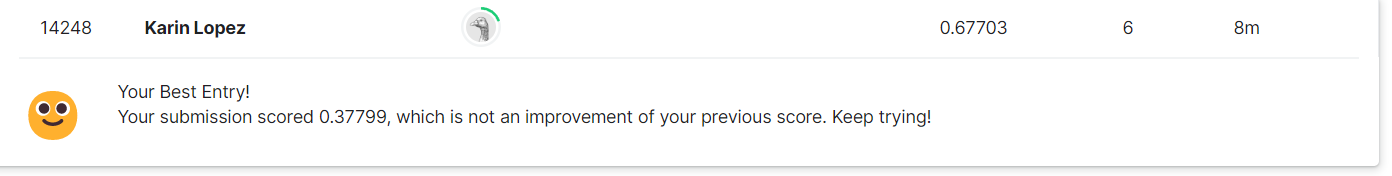

En las diferentes arquitectura se trato de mejorar agregando capas, cambiando los empoch pero el mejor fue la arquitectura 3 incrementando las empoch 